In [1]:
import pandas as pd

DATA_PATH = 'data/bank.xlsx'

df = pd.read_excel(DATA_PATH)
df

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0


In [2]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [3]:
X = df.drop(columns=['ID', 'Personal_Loan'])
y = df['Personal_Loan']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [6]:
X_test.assign(Personal_Loan = y_test).assign(Prediction = lr.predict(X_test)).head(4)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Personal_Loan,Prediction
2559,36,12,88,2,2.700000,1,0,0,0,1,0,0,0
2603,53,27,60,1,0.200000,1,0,0,0,1,0,0,0
3332,36,9,49,2,1.666667,2,0,0,0,0,1,0,0
4267,52,26,194,2,5.700000,2,0,0,0,1,0,1,1


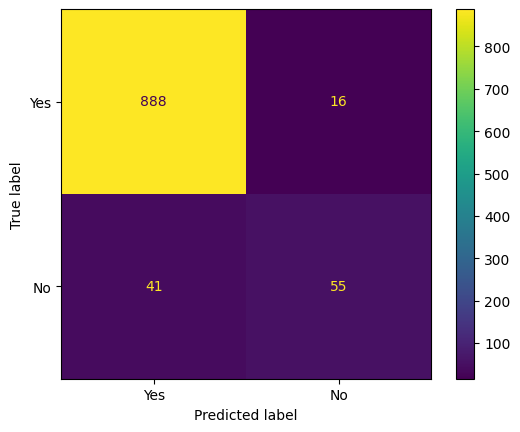

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, lr.predict(X_test)), display_labels=['Yes', 'No'])
cmd.plot()

In [8]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f'LR Train Accuracy -> {(accuracy_score(y_train, lr.predict(X_train)) * 100).round(2)}%')
print(f'LR Test  Accuracy -> {(accuracy_score(y_test, lr.predict(X_test)) * 100).round(2)}%')
print(f'LR Train Balanced Accuracy -> {(balanced_accuracy_score(y_train, lr.predict(X_train)) * 100).round(2)}%')
print(f'LR Test  Balanced Accuracy -> {(balanced_accuracy_score(y_test, lr.predict(X_test)) * 100).round(2)}%')
print(f'LR Train Precision Score -> {(precision_score(y_train, lr.predict(X_train)) * 100).round(2)}%')
print(f'LR Test  Precision Score -> {(precision_score(y_test, lr.predict(X_test)) * 100).round(2)}%')
print(f'LR Train Recall Score -> {(recall_score(y_train, lr.predict(X_train)) * 100).round(2)}%')
print(f'LR Test  Recall Score -> {(recall_score(y_test, lr.predict(X_test)) * 100).round(2)}%')
print(f'LR Train F1 Score -> {(f1_score(y_train, lr.predict(X_train)) * 100).round(2)}%')
print(f'LR Test  F1 Score -> {(f1_score(y_test, lr.predict(X_test)) * 100).round(2)}%')
print(f'LR Train Roc Auc Score -> {(roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]) * 100).round(2)}%')
print(f'LR Test  Roc Auc Score -> {(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]) * 100).round(2)}%')

LR Train Accuracy -> 95.25%
LR Test  Accuracy -> 94.3%
LR Train Balanced Accuracy -> 81.2%
LR Test  Balanced Accuracy -> 77.76%
LR Train Precision Score -> 82.77%
LR Test  Precision Score -> 77.46%
LR Train Recall Score -> 63.8%
LR Test  Recall Score -> 57.29%
LR Train F1 Score -> 72.06%
LR Test  F1 Score -> 65.87%
LR Train Roc Auc Score -> 96.0%
LR Test  Roc Auc Score -> 95.39%


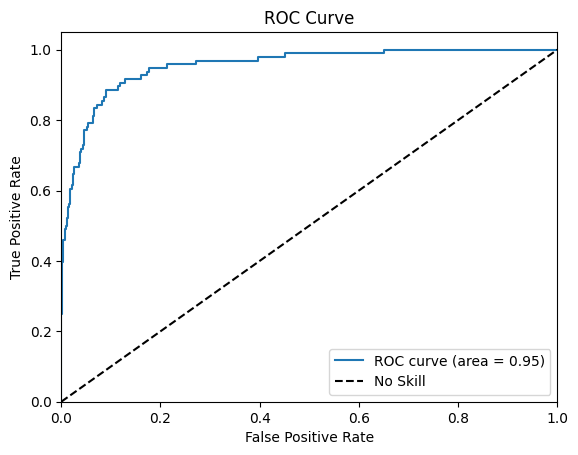

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [10]:
metrics = {
  'model': ['Logistic Regression','Logistic Regression'],
  'type' : ['train', 'test'],
  'accuracy': [(accuracy_score(y_train, lr.predict(X_train))).round(2), (accuracy_score(y_test, lr.predict(X_test))).round(2)],
  'balanced_accuracy': [(balanced_accuracy_score(y_train, lr.predict(X_train))).round(2), (balanced_accuracy_score(y_test, lr.predict(X_test))).round(2)],
  'f1_score': [(f1_score(y_train, lr.predict(X_train))).round(2), (f1_score(y_test, lr.predict(X_test))).round(2)]
}

pd.DataFrame(metrics)

,model,type,accuracy,balanced_accuracy,f1_score
0,Logistic Regression,train,0.95,0.81,0.72
1,Logistic Regression,test,0.94,0.78,0.66
